# Analysis of Pittsburgh Nieghborhoods by Sinlge People #

For my chosen data set I thought it would be funny to find the "most single" neighborhood in pittsburgh. Once I had located my dataset I imported it, and slimmed down the dataframe to only include the variables I would need

In [18]:
import pandas as pd
import geopandas

# Reads in the "housing" dataset into variable csv #
csv = pd.read_csv("housing_dat.csv")

# Transforms csv to a dataFrame (stored in variable "datFrame") #
datFrame = pd.DataFrame(csv)

# Slims down the two variables we will be looking at and makes new dataframes for it #
# This step isn't necessary but it makes the data easier on the eyes when viewing it #
singleFrame = datFrame[['Community', '%single_person']]
cougarFrame = datFrame[['Community', '%single_parent_family']]

# Shows the singles dataframe to make sure we didn't mess up #
singleFrame.head()

,Community,%single_person
0,Aleppo,15.0
1,Allegheny Center,61.0
2,Allegheny County,25.2
3,Allegheny West,30.0
4,Allentown,26.0


In [19]:
# Shows the "cougar data frame" to make sure we didn't mess up #
cougarFrame.head()

,Community,%single_parent_family
0,Aleppo,8.0
1,Allegheny Center,10.0
2,Allegheny County,14.1
3,Allegheny West,35.0
4,Allentown,21.0


### Mapping communities geographically ###
Now that the data sets are properly loaded into the program, I take it and merge it with the provided "neighborhood" .shape file so that we can get a nice visual!

In [20]:
# Neighborhoods "shape" file #
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

# Merges the singles dataframe with the map #
singles_map = neighborhoods.merge(singleFrame, how='left', left_on='hood', right_on='Community')

# Merges the cougars dataframe with the map #
cougar_map = neighborhoods.merge(cougarFrame, how='left', left_on='hood', right_on='Community')

# Again we check to make sure the merge went smoothly #
singles_map[['hood','%single_person','geometry']].head()

,hood,%single_person,geometry
0,Central Oakland,37.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,63.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,36.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,46.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,43.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


In [21]:
# Checking the cougar map to make sure the merge went as planned #
cougar_map[['hood','%single_parent_family','geometry']].head()

,hood,%single_parent_family,geometry
0,Central Oakland,10.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,5.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,38.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,27.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,28.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


### Mapping without legend ###
This section follows lab 9 just as the previous few have. I check the data maps to make sure that they're correct and plot them. Althoug without the legend showing how the colors correspond with the "density" values, it doesn't mean too much.

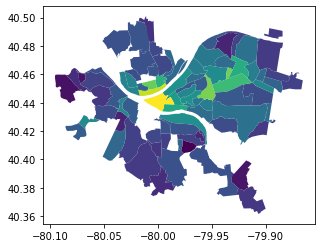

In [22]:
singles_map.plot(column='%single_person')

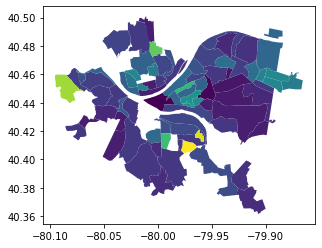

In [23]:
cougar_map.plot(column='%single_parent_family')

## Map of sinlges in your area

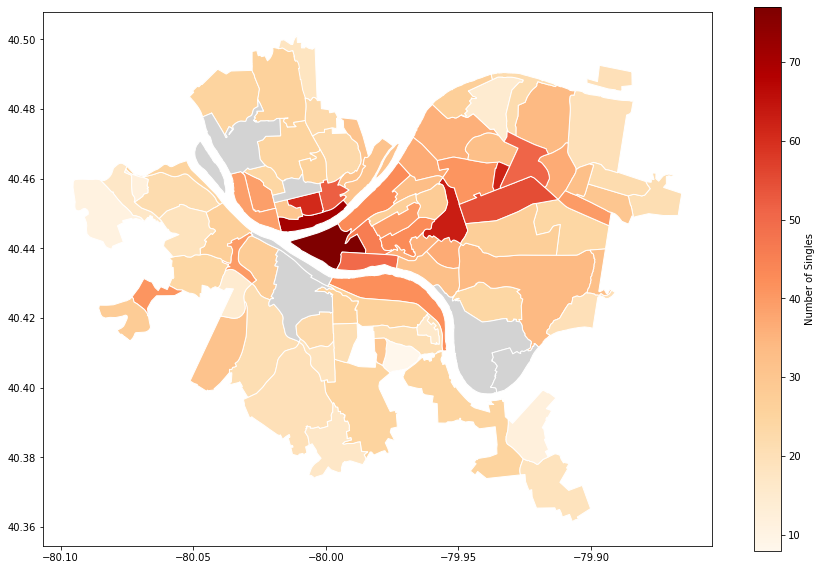

In [24]:
singles_map.plot(column='%single_person', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Singles"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Map of single moms in your area ##
Okay so now that we have the data loaded correctly for singles, lets do the same for the "%single_parent_family" dataframe.

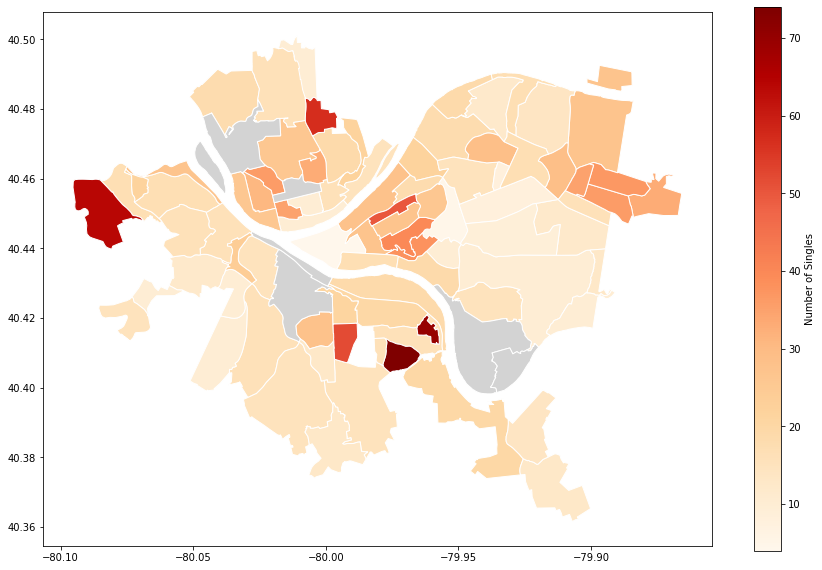

In [25]:
cougar_map.plot(column='%single_parent_family', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Singles"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

### Interpreting map data into plain text ###
Next I took the plain dataframes, holding all of the data, and found the maximum single parent percentages and the maximum single person percentages. Then I took this knowledge and located the names of said neighborhoods!

In [26]:
# Finding the max % of singles and single parent families #
max_single_percent = str(singleFrame['%single_person'].max())
max_single_parent_percent = str(cougarFrame['%single_parent_family'].max())

# Finding the ID/Index of the max singleperson and max singleparentfamily #
singleID = singleFrame['%single_person'].idxmax()
singleParentID = cougarFrame['%single_parent_family'].idxmax()

# Locates the name of each max % communities
mostSingle = singleFrame.iloc[singleID, 0]
mostSingleParent = cougarFrame.iloc[singleParentID, 0]

# Prints the names of the most single communities
print("maximum single % " + max_single_percent + " " + mostSingle)
print("maximum single parent % " + max_single_parent_percent + " " + mostSingleParent)

maximum single % 77.0 Central Business District
maximum single parent % 74.0 St. Clair


### Most single person neighborhood : Central Buisness District ###
### Most single parent neighborhood : St.Clair ###
Now that I knew each individual variables maximum percentage and neighborhood label, we can move on to how I determined the best overall neighborhood for single people. I first took the two datasets and combined them into one. This new dataset was then used to average the single parent percentages, and the single person percentages to find the overall "single percentage". This was then used to find the index, name, and percentage of the neighborhood with the most single people in Pittsburgh. 

In [44]:
# Combines the "single person %" data and the " single parent family %" together into one dataframe so we can take the average
combinedDat = pd.concat([singleFrame, datFrame[['%single_parent_family']]], axis = 1)

# Adds a column "avg" which holds the overall average single %
combinedDat['avg'] = combinedDat.mean(axis=1)

# Finds the highest average percent of single people and single parent families
maximumSinglePercent = combinedDat.max()

# Locates the name of the neighborhood with the highest average percent of singles
percent = combinedDat['avg'].max()
neighborhood = combinedDat.iloc[combinedDat['avg'].idxmax(), 0]

print("The most single neighborhood in Pittsburgh is " + neighborhood + "\nwith an average single percentage of " + str(percent) + " percent of the area being single")

The most single neighborhood in Pittsburgh is Arlington Heights
with an average single percentage of 43.0 percent of the area being single


# The final answer #
The most single neighborhood in Pittsburgh is Arlington Heights with an average of **43%** of residents being single.


![nice](https://media.giphy.com/media/huyVJYSKcArLiu8J5g/giphy.gif)